<a href="https://colab.research.google.com/github/Nkbhapkar/EDA-on-playstore/blob/main/Exploratory_data_analysis_on_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Exploratory data analysis on Playstore

The main objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.Now a days playstore contain multiple apps but some are successfull and some of them are unsuccessfull.. This dataset contains details of different applications and reviews from different users.By exploring the data we have analyse the key factors which are responsible for app success.

Exporatory data analysis of playstore involves following steps

Loading the data into data frame
Cleaning the data
Extracting statistics from the dataset
Exploratory analysis and visualizations
Conclusion


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgmgNJZymSyk-Ca_I3uBJ66cqQt6PHMbLW2owpDZGI7I_-PL3W9yM4
Mounted at /content/drive


In [2]:
# Import the libraries for EDA project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Data Preparation

It is the process in which finding the missing values,cleaning and transforming raw data prior to processing and analysis. It is a crucial step before processing and sometimes involves reformatting data, making corrections to data and therefore the combining of knowledge sets to complement data.

Loading the dataset and Reading the csv file for further operation

In [3]:
ps_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capston_1/Copy of Play Store Data.csv')
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
#check the shape of dataset
ps_df.shape

(10841, 13)

In [4]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Does the dataset has any Nan value?

In [6]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we see that some missing values in the dataset. so that we have to detail lookout into dataframe for missing values in dataset.

Let's define a function to view some more insights of the dataset.

In [7]:
#now we have to check null values or missing values present in the different columns
def printinfo():
    dumb = pd.DataFrame(index=ps_df.columns)
    dumb['data_type'] = ps_df.dtypes
    dumb['null_count'] = ps_df.isnull().sum()
    dumb['unique_count'] = ps_df.nunique()
    return dumb

In [8]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


from above information we conclude that Rating ,Type ,current version and android version has missing values .

we need to clean up the dataset for exploratory data analysis 

Look into column of Content rating there is one row has missing value

In [9]:
ps_df[ps_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



drop this row 10472 

In [16]:
ps_df.dropna(subset = ['Content Rating'], inplace=True)

Lets have a look on a row of rating column has Null values 

In [ ]:
ps_df[ps_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Lets have a look on a row of Type column has Null values

In [18]:
ps_df[ps_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


There is only one missing value found so that we have to fill these value as free in the dataset

In [19]:
ps_df['Type'].fillna("Free", inplace = True)

In [20]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
#Drop the unwanted column in dataset such as current version ,android version and last updated
ps_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [22]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [25]:
# Rating column contain somme missing values these missing values are replaced with mode value of entire column
missing_value = ps_df['Rating'].mode()

In [27]:
missing_value

0    4.4
dtype: float64

In [28]:
ps_df['Rating'].fillna(value=missing_value[0], inplace = True)

In [29]:
#we have to check again any missing value is remaining or not 
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [30]:
#checking the unique category in dataset
ps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [56]:
ps_df['Category'].nunique()

33

Now we want to convert Review , size , installs and price column from **object** to **number**

**Review** **column**

In [54]:
#converting review in integer form
ps_df['Reviews'] = ps_df.Reviews.astype(int)

In [55]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


**Price column**

In [33]:
ps_df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$2.90         1
$46.99        1
$3.90         1
$1.76         1
$4.85         1
Name: Price, Length: 92, dtype: int64

In [37]:
# we remove $ sign form price then it convert into float(number) form
ps_df['Price'] = pd.to_numeric(ps_df['Price'].str.replace('$',''))

In [38]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


**Size** **column**

In [39]:
ps_df['Size'] = ps_df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign
ps_df['Size'] = ps_df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`
ps_df['Size'] = ps_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
ps_df['Size'] = ps_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
ps_df['Size'] = ps_df.Size.replace('Varies with device', np.NaN)#Replacing the Varies with device value with Nan.

In [41]:
ps_df['Size'] = pd.to_numeric(ps_df['Size']) # Converting the string to Numeric type

In [43]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


Drop the rows which contain NaN values in size column because some app have larger size and some has smaller size so that it is not good idea by replacing Nan value with mean or mode value 

In [44]:
ps_df.dropna(subset=['Size'],inplace=True)

In [45]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


**Installs** **column**

In [47]:
#First of all we will need to remove the + symbol from the values
ps_df['Installs'] = ps_df.Installs.apply(lambda x: x.strip('+'))

#Then let's remove the , from the numbers.
ps_df['Installs'] = ps_df.Installs.apply(lambda x: x.replace(',', ''))

#Lastly we will need to convert it from string type to numeric type
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'])

printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


Upto here total data cleaning is done so that we have to check the shape of dataset now and do Exploratory data analysis

In [59]:
ps_df.shape

(9145, 10)

In [49]:
ps_df.describe()

,Rating,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.151653e+07,7.114842e+06,1.184366
std,0.507267,2.258875e+07,4.619357e+07,17.355754
min,1.000000,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,3.000000e+07,1.000000e+06,0.000000
max,5.000000,1.000000e+08,1.000000e+09,400.000000


**Analysis on Apps in dataset**

In [58]:
#Checking the number of different types of apps
ps_df['App'].nunique()

8434

Now we have check if any app have duplicates

In [62]:
boolean = ps_df['App'].duplicated().any()
boolean

True

In [63]:
ps_df['App'].value_counts()

ROBLOX                    9
8 Ball Pool               7
Candy Crush Saga          7
Nick                      6
Bubble Shooter            6
                         ..
Fuel Calculator for EY    1
Archie Comics             1
R-TYPE II                 1
CS                        1
FlashLight F.Light        1
Name: App, Length: 8434, dtype: int64

As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not

In [64]:
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1653,ROBLOX,GAME,4.5,4447388,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
1701,ROBLOX,GAME,4.5,4447346,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
1748,ROBLOX,GAME,4.5,4448791,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
1841,ROBLOX,GAME,4.5,4449882,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
1870,ROBLOX,GAME,4.5,4449910,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
2016,ROBLOX,FAMILY,4.5,4449910,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
2088,ROBLOX,FAMILY,4.5,4450855,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
2206,ROBLOX,FAMILY,4.5,4450890,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure
4527,ROBLOX,FAMILY,4.5,4443407,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [65]:
ps_df.drop_duplicates(inplace=True)

In [68]:
#after finding duplicates shape of dataset
ps_df.shape

(8829, 10)

# Apps which are paid and free analysis
Apps which are free and paid of different category as shown in bar plot

In [69]:
ps_df['Type']

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10835    Free
10836    Free
10837    Free
10838    Free
10840    Free
Name: Type, Length: 8829, dtype: object

In [72]:
app_df = ps_df['Type'].value_counts().index
app_df

Index(['Free', 'Paid'], dtype='object')

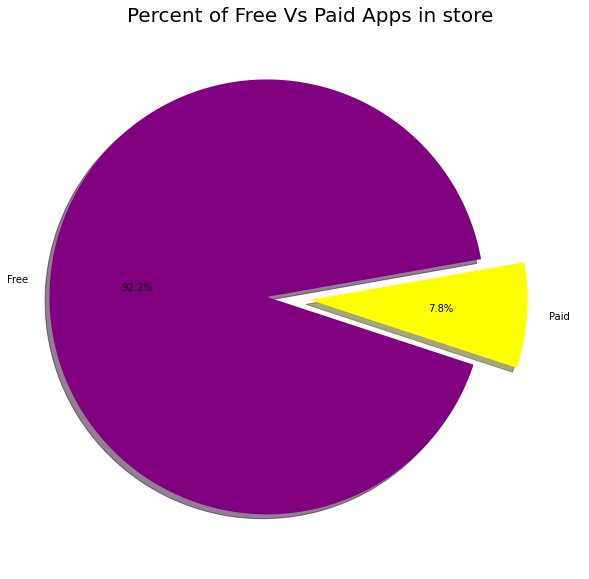

In [91]:
plt.figure(figsize=(10,10))
labels =ps_df['Type'].value_counts(sort = True).index
sizes = ps_df['Type'].value_counts(sort = True)
colors = ["purple","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%' ,shadow=True, startangle=10)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

From above pie chart it is easily seen that dataset contain 92.2% Free apps and 7.8% paid apps

# Category
Now we can see which category contain how many number of apps

In [92]:
ps_df['Category'].value_counts()

FAMILY                 1806
GAME                   1000
TOOLS                   738
MEDICAL                 380
BUSINESS                379
PERSONALIZATION         354
LIFESTYLE               338
FINANCE                 304
PRODUCTIVITY            299
SPORTS                  296
COMMUNICATION           260
PHOTOGRAPHY             243
HEALTH_AND_FITNESS      240
NEWS_AND_MAGAZINES      209
SOCIAL                  203
BOOKS_AND_REFERENCE     196
SHOPPING                180
TRAVEL_AND_LOCAL        179
DATING                  178
VIDEO_PLAYERS           131
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK           98
EDUCATION                96
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
ENTERTAINMENT            67
ART_AND_DESIGN           62
HOUSE_AND_HOME           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


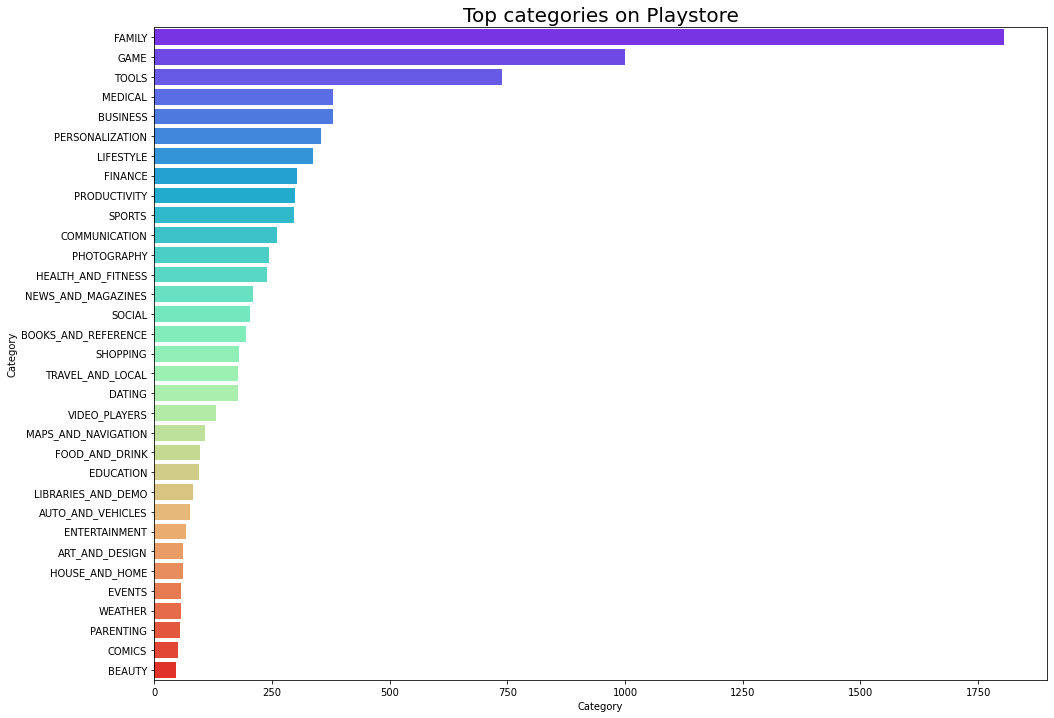

In [97]:
#Top categories on playstore
y = ps_df['Category'].value_counts().index
x = ps_df['Category'].value_counts()
plt.figure(figsize=(16,12))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x , y , palette= "rainbow")
graph.set_title("Top categories on Playstore", fontsize = 20);

Let find out the which genre has maximum number of count

In [98]:
sns.set_style('dark')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.facecolor'] = 'white'

In [99]:
top_genres = ps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [100]:
genres_installs = ps_df.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


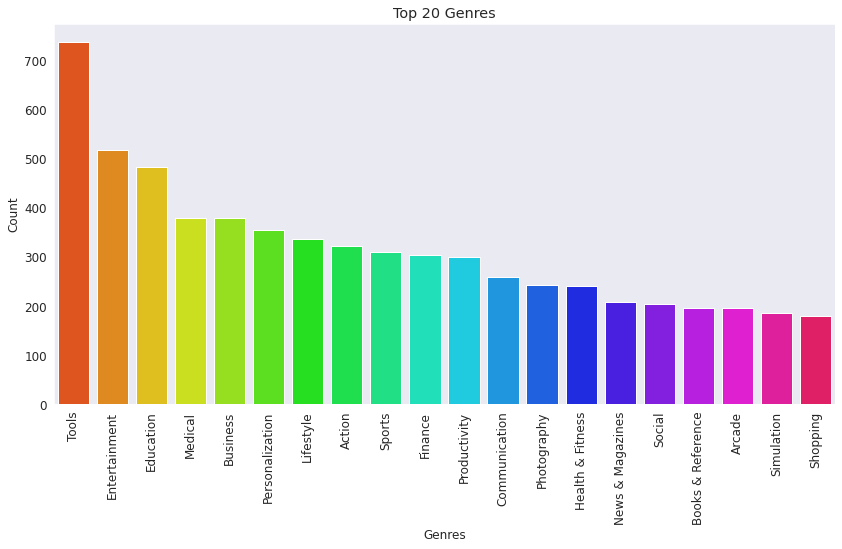

In [101]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count,palette= "hsv")
plt.show()

# Content rating


Now we have to look on content rating according to age group.From, this we can easily find out which age group gives rating mostly to the apps on playstore

In [105]:
x2 = ps_df['Content Rating'].value_counts().index
x2

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object')

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object')

In [106]:
y2 = ps_df['Content Rating'].value_counts()
y2

Everyone           7193
Teen                951
Mature 17+          368
Everyone 10+        313
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

Everyone           7193
Teen                951
Mature 17+          368
Everyone 10+        313
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

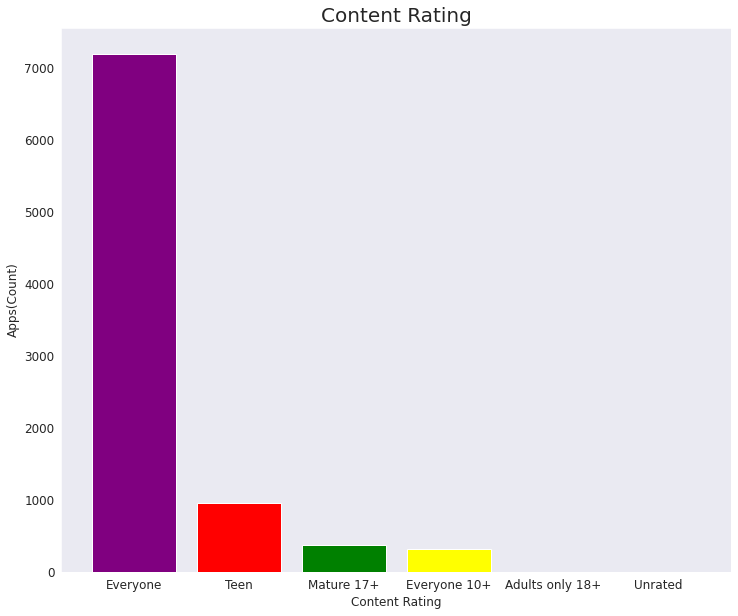

In [110]:
plt.figure(figsize=(12,10))
plt.bar(x2,y2,width=0.8,color=['purple','red','green','yellow','cyan','blue']);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

from this graph it is easily seen that everyone was gives rating to apps in playstore, there is no such age group was rated mostly .

Lets have a look on distribution of rating

In [111]:
ps_df['Rating'].describe()

count    8829.000000
mean        4.207759
std         0.510991
min         1.000000
25%         4.000000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

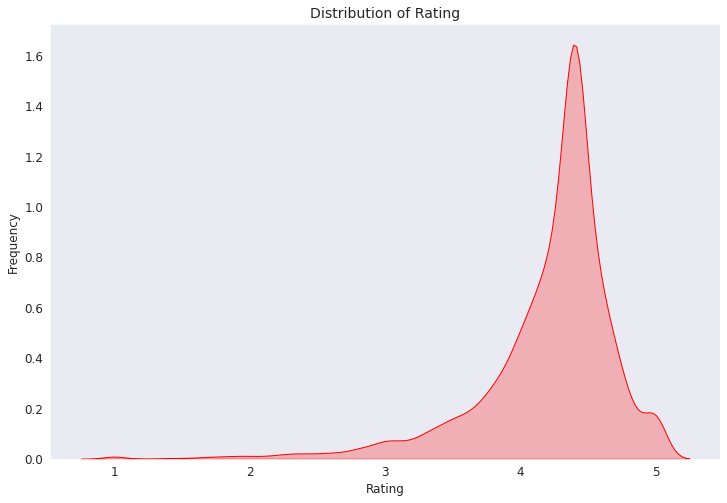

In [112]:
plt.figure(figsize=(12,8))
graph =  sns.kdeplot(ps_df.Rating, color="red", shade = True)
graph.set_xlabel('Rating')
graph.set_ylabel('Frequency')
plt.title('Distribution of Rating',size = 14)
plt.show()

From the graph we can conclude that most of rating given are 3.5 to 4.7